# Assignment 12 - Neural Networks image recognition
Use both MLNN and the ConvNet to solve the following problem.

1. Add random noise (i.e. `np.random.normal`) to the images in training and testing. Make sure each image gets a different noise feature added to it. Inspect by printing out an image. 
2. Compare the loss/accuracy (train, val) after N epochs for both MLNN and ConvNet with and without noise. 
3. Vary the amount of noise (multiply `np.random.normal` by a factor) and keep track of the accuracy and loss (for training and validation) and plot these results.

# Neural Networks - Image Recognition 

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import RMSprop, Nadam, Adadelta
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend

import numpy as np
import matplotlib.pyplot as  plt
%matplotlib inline

Using TensorFlow backend.


# Part 1: Without Noise

## Multi Layer Neural Network
Trains a simple deep NN on the MNIST dataset.
Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).

In [2]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
np.max(x_train[0])

255

In [4]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


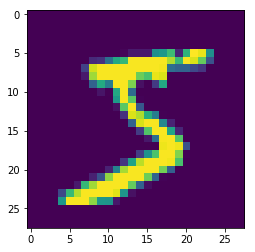

In [5]:
#check out an image from training set
plt.imshow(x_train[0].reshape(28,28)) #need to add in .reshape to the shape of the matrix to plot
plt.show()

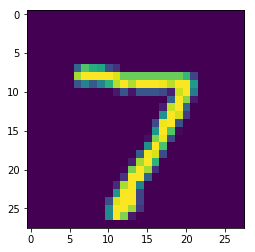

In [6]:
#check out an image from test set
plt.imshow(x_test[0].reshape(28,28))

In [7]:
#changed parameters to see if performance improves.  Introduce a 3rd layer, increase epochs, change activation
#use mutliples of 8bits

batch_size = 128
num_classes = 10
epochs = 30


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [8]:
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total para

**Observation:** Changing a few of the parameters the results were generally slightly better and increased to 98.5%. Perhaps we've reached maximum accuracy? 

## Conv Net
Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).


In [2]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [3]:
#changed parameters for model, changed optimizer, decreased batch size, decrease epochs, decrease neurons (to speed up processing)

batch_size = 64
num_classes = 10
epochs = 8

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Nadam(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 253s - loss: 0.2495 - acc: 0.9231 - val_loss: 0.0576 - val_acc: 0.9813
Epoch 2/8
60000/60000 [==============================] - 257s - loss: 0.1119 - acc: 0.9671 - val_loss: 0.0405 - val_acc: 0.9868
Epoch 3/8
60000/60000 [==============================] - 276s - loss: 0.0897 - acc: 0.9731 - val_loss: 0.0360 - val_acc: 0.9883
Epoch 4/8
60000/60000 [==============================] - 260s - loss: 0.0794 - acc: 0.9756 - val_loss: 0.0360 - val_acc: 0.9882
Epoch 5/8
60000/60000 [==============================] - 238s - loss: 0.0673 - acc: 0.9791 - val_loss: 0.0303 - val_acc: 0.9903
Epoch 6/8
60000/60000 [==============================] - 216s - loss: 0.0611 - acc: 0.9808 - val_loss: 0.0311 - val_acc: 0.9907
Epoch 7/8
60000/60000 [==============================] - 251s - loss: 0.0585 - acc: 0.9814 - val_loss: 0.0356 - val_acc: 0.9896
Epoch 8/8
60000/60000 [==============================]

In [4]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0279816686263
Test accuracy: 0.9919


**Observation:** Accuracy was 0.05% lower than the given model and parameters, which is surprising given the low number of epochs and the smaller batch sizes and neurons. 

# NOTE:  See other Week 12 Notebook for Part 2: With noise (np.random.normal)  
### [repeated error codes below, was easier if I started a new kernel.  I didn't want to lose my previous work, especially as processing time took hours, so I copied it into another notebook.]

## Multi Layer Neural Network
Trains a simple deep NN on the MNIST dataset.
Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).

In [18]:
x2_train = x_train.reshape(60000, 784)
x2_test = x_test.reshape(10000, 784)

x2_train = x_train * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x2_test = x_test * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x2_train = x2_train.astype('float32')
x2_test = x2_test.astype('float32')
x2_train /= 255
x2_test /= 255
print(x2_train.shape, 'train samples')
print(x2_test.shape, 'test samples')

(60000, 784) train samples
(10000, 784) test samples


In [21]:
batch_size = 128
num_classes = 10
epochs = 30


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x2_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x2_test, y_test))
score = model.evaluate(x2_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                5130      
Total para

ValueError: Input arrays should have the same number of samples as target arrays. Found 60000 input samples and 600000 target samples.